In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from ydata_profiling import ProfileReport
import sweetviz as sv
 

In [2]:
import plotly.express as px

## Loading the data

In [3]:
df = pd.read_csv("coursera_dataset.csv")

## Viewing the dataframe

In [4]:
df

,Course Title,Rating,Provider,Level,Reviews,Type,Duration
0,Google Data Analytics,4.8,Google,Beginner,151000.0,Professional Certificate,3 - 6 Months
1,Google Cybersecurity,4.8,Google,Beginner,35000.0,Professional Certificate,3 - 6 Months
2,Google Project Management:,4.8,Google,Beginner,112000.0,Professional Certificate,3 - 6 Months
3,Google Digital Marketing & E-commerce,4.8,Google,Beginner,30000.0,Professional Certificate,3 - 6 Months
4,Google UX Design,4.8,Google,Beginner,83000.0,Professional Certificate,3 - 6 Months
...,...,...,...,...,...,...,...
4994,Kubernetes Engine: Qwik Start,4.8,Google Cloud,Beginner,16.0,Project,Less Than 2 Hours
4995,Explore Einstein's theories of Relativity usin...,3.8,Coursera Project Network,Advanced,10.0,Guided Project,Less Than 2 Hours
4996,FIFA20 Data Exploration using Python,4.6,Coursera Project Network,Beginner,55.0,Guided Project,Less Than 2 Hours
4997,Create an online presence with a free website ...,2.3,Coursera Project Network,Beginner,7.0,Guided Project,Less Than 2 Hours


## Data Profiling

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Course Title  4999 non-null   object 
 1   Rating        4999 non-null   object 
 2   Provider      4999 non-null   object 
 3   Level         4999 non-null   object 
 4   Reviews       4999 non-null   float64
 5   Type          4999 non-null   object 
 6   Duration      4999 non-null   object 
dtypes: float64(1), object(6)
memory usage: 273.5+ KB


In [6]:
df.describe()

,Reviews
count,4999.000000
mean,2171.558112
std,9969.567436
min,0.000000
25%,34.500000
50%,224.000000
75%,1100.000000
max,273000.000000


In [7]:
df.shape

(4999, 7)

## -----

In [8]:
from ydata_profiling import ProfileReport

In [9]:
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## -----

## Data Quality Checks

### 1. Reliability:

In [10]:
# The data is reliable as it is sourced from Coursera, a globally recognized online learning platform.

### 2. Timeliness:

In [11]:
# The data is up-to-date for 2024

### 3. Consistency

In [12]:
# The values in the data are consistent, which ensures uniformity across its educational content

### 4. Relevance:

In [13]:
df.columns

Index(['Course Title', 'Rating', 'Provider', 'Level', 'Reviews', 'Type',
       'Duration'],
      dtype='object')

In [14]:
# All columns are relevant for our analysis

In [15]:
df.sample(10)

,Course Title,Rating,Provider,Level,Reviews,Type,Duration
3697,Light Emitting Diodes and Semiconductor Lasers,3.9,University of Colorado Boulder,Advanced,45.0,Course,1 - 3 Months
1481,The Business of Product Management I,4.5,Advancing Women in Tech,Beginner,761.0,Course,1 - 4 Weeks
4492,Getting Started with SAS Visual Analytics,4.7,SAS,Beginner,855.0,Course,1 - 4 Weeks
1711,Qualitative Research Methods,4.6,University of Amsterdam,Intermediate,1300.0,Course,1 - 3 Months
160,AWS Cloud Solutions Architect,4.8,Amazon Web Services,Intermediate,5700.0,Professional Certificate,3 - 6 Months
3897,Grow Your Cannabis,No rating,University of Illinois Urbana-Champaign,Beginner,0.0,Course,1 - 3 Months
3122,Specialized Models: Time Series and Survival A...,4.5,IBM,Intermediate,125.0,Course,1 - 4 Weeks
1563,Introduction to Databases,4.7,Meta,Beginner,1100.0,Course,1 - 3 Months
2299,Angular 17,No rating,LearnQuest,Beginner,0.0,Specialization,1 - 3 Months
3461,Programming for the Internet of Things Project,4.7,"University of California, Irvine",Mixed,888.0,Course,1 - 3 Months


### 5. Uniqueness:

In [16]:
df.duplicated().sum()

0

### 6. Completeness:

In [17]:
df.isnull().sum().sort_values(ascending = False)

Course Title    0
Rating          0
Provider        0
Level           0
Reviews         0
Type            0
Duration        0
dtype: int64

### 7. Check Accuracy:

In [18]:
df.dtypes

Course Title     object
Rating           object
Provider         object
Level            object
Reviews         float64
Type             object
Duration         object
dtype: object

In [19]:
df[df["Duration"] == "Course"]

,Course Title,Rating,Provider,Level,Reviews,Type,Duration


In [20]:
df.shape

(4999, 7)

In [21]:
df = df[df["Duration"] != "Course"]

In [22]:
df[df["Reviews"] == "No reviews"]

,Course Title,Rating,Provider,Level,Reviews,Type,Duration


In [23]:
(df["Reviews"] == "No reviews").sum()

0

In [24]:
df["Reviews"].unique()

array([1.51e+05, 3.50e+04, 1.12e+05, 3.00e+04, 8.30e+04, 1.91e+05,
       2.60e+04, 1.44e+05, 1.30e+05, 8.00e+04, 3.50e+03, 5.30e+04,
       4.20e+03, 4.70e+04, 6.50e+04, 8.40e+04, 2.50e+04, 4.10e+04,
       1.04e+05, 9.20e+04, 5.10e+04, 5.00e+04, 1.90e+04, 2.40e+04,
       4.50e+04, 1.60e+03, 9.00e+04, 1.30e+04, 2.30e+04, 1.60e+04,
       5.70e+03, 4.20e+04, 2.20e+04, 3.60e+04, 2.60e+03, 2.73e+05,
       2.10e+04, 8.44e+02, 3.90e+03, 2.10e+03, 1.52e+05, 3.40e+03,
       4.80e+03, 1.10e+04, 9.10e+03, 6.20e+03, 1.00e+04, 1.70e+04,
       3.10e+03, 2.00e+03, 8.00e+03, 7.20e+03, 3.20e+04, 6.90e+03,
       5.80e+03, 6.00e+03, 2.80e+04, 8.72e+02, 1.70e+03, 6.70e+04,
       1.80e+03, 1.40e+03, 2.25e+02, 1.99e+02, 2.20e+03, 1.90e+03,
       9.00e+03, 4.60e+03, 3.80e+03, 8.30e+03, 6.10e+03, 7.70e+03,
       8.50e+03, 2.00e+04, 1.80e+04, 4.70e+03, 7.50e+01, 1.10e+03,
       3.30e+03, 3.70e+03, 3.20e+03, 1.22e+05, 6.10e+04, 4.90e+04,
       9.30e+03, 3.60e+03, 2.70e+03, 8.01e+02, 8.70e+03, 5.60e

In [25]:
'''df['Reviews'] = df['Reviews'].astype(str)
df['Reviews'] = df['Reviews'].apply(lambda x: 
                                  float(x.replace('K', '')) * 1000 if 'K' in x else 
                                  (float(x) if x != 'No reviews' else 0.0))'''

"df['Reviews'] = df['Reviews'].astype(str)\ndf['Reviews'] = df['Reviews'].apply(lambda x: \n                                  float(x.replace('K', '')) * 1000 if 'K' in x else \n                                  (float(x) if x != 'No reviews' else 0.0))"

In [26]:
def convert_reviews(x):
    if isinstance(x, str):
        if 'K' in x:
            return float(x.replace('K', '')) * 1000
        elif x == 'No reviews':
            return 0.0
        else:
            return float(x)
    return float(x)

# Apply the conversion
df['Reviews'] = df['Reviews'].apply(convert_reviews)

In [27]:
df["Reviews"].unique()

array([1.51e+05, 3.50e+04, 1.12e+05, 3.00e+04, 8.30e+04, 1.91e+05,
       2.60e+04, 1.44e+05, 1.30e+05, 8.00e+04, 3.50e+03, 5.30e+04,
       4.20e+03, 4.70e+04, 6.50e+04, 8.40e+04, 2.50e+04, 4.10e+04,
       1.04e+05, 9.20e+04, 5.10e+04, 5.00e+04, 1.90e+04, 2.40e+04,
       4.50e+04, 1.60e+03, 9.00e+04, 1.30e+04, 2.30e+04, 1.60e+04,
       5.70e+03, 4.20e+04, 2.20e+04, 3.60e+04, 2.60e+03, 2.73e+05,
       2.10e+04, 8.44e+02, 3.90e+03, 2.10e+03, 1.52e+05, 3.40e+03,
       4.80e+03, 1.10e+04, 9.10e+03, 6.20e+03, 1.00e+04, 1.70e+04,
       3.10e+03, 2.00e+03, 8.00e+03, 7.20e+03, 3.20e+04, 6.90e+03,
       5.80e+03, 6.00e+03, 2.80e+04, 8.72e+02, 1.70e+03, 6.70e+04,
       1.80e+03, 1.40e+03, 2.25e+02, 1.99e+02, 2.20e+03, 1.90e+03,
       9.00e+03, 4.60e+03, 3.80e+03, 8.30e+03, 6.10e+03, 7.70e+03,
       8.50e+03, 2.00e+04, 1.80e+04, 4.70e+03, 7.50e+01, 1.10e+03,
       3.30e+03, 3.70e+03, 3.20e+03, 1.22e+05, 6.10e+04, 4.90e+04,
       9.30e+03, 3.60e+03, 2.70e+03, 8.01e+02, 8.70e+03, 5.60e

In [28]:
df.dtypes

Course Title     object
Rating           object
Provider         object
Level            object
Reviews         float64
Type             object
Duration         object
dtype: object

In [29]:
df[df["Rating"] == "No rating"]

,Course Title,Rating,Provider,Level,Reviews,Type,Duration
280,Strategy and Game Theory for Management,No rating,IIMA - IIM Ahmedabad,Intermediate,0.0,Course,1 - 3 Months
306,Renew your CBRS Professional Installer certifi...,No rating,Google - Spectrum Sharing,Advanced,0.0,Course,1 - 3 Months
493,Music Production: Crafting Award-Worthy Songs,No rating,GRAMMY GO,Beginner,0.0,Specialization,1 - 3 Months
605,Workday in Action Series,No rating,Workday,Beginner,0.0,Course,1 - 3 Months
716,Cost Effectiveness and Decision Making for Hea...,No rating,National University of Singapore,Beginner,0.0,Course,1 - 4 Weeks
...,...,...,...,...,...,...,...
4988,Automated Reasoning with GPT Assistant API: Re...,No rating,Coursera Project Network,Intermediate,0.0,Guided Project,Less Than 2 Hours
4989,MySQL-for-Data-Engineering,No rating,Duke University,Beginner,0.0,Guided Project,Less Than 2 Hours
4991,Write Blog Posts With Outranking: Rank Article...,No rating,Coursera Project Network,Beginner,0.0,Guided Project,Less Than 2 Hours
4992,Using JavaScript with AI: Enhancing Developmen...,No rating,Coursera Project Network,Intermediate,0.0,Guided Project,Less Than 2 Hours


In [30]:
df[df["Provider"] == "No provider"]

,Course Title,Rating,Provider,Level,Reviews,Type,Duration


In [31]:
df[df["Course Title"] == "No course"]

,Course Title,Rating,Provider,Level,Reviews,Type,Duration


In [32]:
# Splitting the column
df[['Start', 'End']] = df['Duration'].str.extract(r'(\d+)\s*-\s*(\d+)')
df['Unit'] = df['Duration'].str.extract(r'(\bMonths\b|\bWeeks\b)')

# Fill NaN values with 0
df['Start'] = df['Start'].fillna(0).astype(int)
df['End'] = df['End'].fillna(0).astype(int)

In [33]:
df.loc[df['Unit'] == 'Months', ['Start', 'End']] *= 4
df['Unit'] = 'Weeks'

In [34]:
df

,Course Title,Rating,Provider,Level,Reviews,Type,Duration,Start,End,Unit
0,Google Data Analytics,4.8,Google,Beginner,151000.0,Professional Certificate,3 - 6 Months,12,24,Weeks
1,Google Cybersecurity,4.8,Google,Beginner,35000.0,Professional Certificate,3 - 6 Months,12,24,Weeks
2,Google Project Management:,4.8,Google,Beginner,112000.0,Professional Certificate,3 - 6 Months,12,24,Weeks
3,Google Digital Marketing & E-commerce,4.8,Google,Beginner,30000.0,Professional Certificate,3 - 6 Months,12,24,Weeks
4,Google UX Design,4.8,Google,Beginner,83000.0,Professional Certificate,3 - 6 Months,12,24,Weeks
...,...,...,...,...,...,...,...,...,...,...
4994,Kubernetes Engine: Qwik Start,4.8,Google Cloud,Beginner,16.0,Project,Less Than 2 Hours,0,0,Weeks
4995,Explore Einstein's theories of Relativity usin...,3.8,Coursera Project Network,Advanced,10.0,Guided Project,Less Than 2 Hours,0,0,Weeks
4996,FIFA20 Data Exploration using Python,4.6,Coursera Project Network,Beginner,55.0,Guided Project,Less Than 2 Hours,0,0,Weeks
4997,Create an online presence with a free website ...,2.3,Coursera Project Network,Beginner,7.0,Guided Project,Less Than 2 Hours,0,0,Weeks


In [35]:
df[df["Duration"] == "Less Than 2 Hours"]

,Course Title,Rating,Provider,Level,Reviews,Type,Duration,Start,End,Unit
582,Getting Started with Power BI Desktop,4.7,Coursera Project Network,Beginner,3800.0,Guided Project,Less Than 2 Hours,0,0,Weeks
775,Excel for Beginners: Introduction to Spreadsheets,4.7,Coursera Project Network,Beginner,113.0,Guided Project,Less Than 2 Hours,0,0,Weeks
889,Excel for Beginners: Pivot Tables,4.6,Coursera Project Network,Beginner,83.0,Guided Project,Less Than 2 Hours,0,0,Weeks
1019,HR Analytics- Build an HR dashboard using Powe...,4.6,Coursera Project Network,Beginner,273.0,Guided Project,Less Than 2 Hours,0,0,Weeks
1078,ChatGPT for Beginners: Save time with Microsof...,4.6,Coursera Project Network,Intermediate,159.0,Guided Project,Less Than 2 Hours,0,0,Weeks
...,...,...,...,...,...,...,...,...,...,...
4994,Kubernetes Engine: Qwik Start,4.8,Google Cloud,Beginner,16.0,Project,Less Than 2 Hours,0,0,Weeks
4995,Explore Einstein's theories of Relativity usin...,3.8,Coursera Project Network,Advanced,10.0,Guided Project,Less Than 2 Hours,0,0,Weeks
4996,FIFA20 Data Exploration using Python,4.6,Coursera Project Network,Beginner,55.0,Guided Project,Less Than 2 Hours,0,0,Weeks
4997,Create an online presence with a free website ...,2.3,Coursera Project Network,Beginner,7.0,Guided Project,Less Than 2 Hours,0,0,Weeks


In [36]:
df = df[df['Duration'] != "Less Than 2 Hours"]

In [37]:
df[df["Duration"] == "Less Than 2 Hours"]

,Course Title,Rating,Provider,Level,Reviews,Type,Duration,Start,End,Unit


In [38]:
df[df["Duration"] == 0]

,Course Title,Rating,Provider,Level,Reviews,Type,Duration,Start,End,Unit


In [39]:
df['Duration / Weeks'] = df['Start'].astype(str) + ' - ' + df['End'].astype(str)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13168\933786616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration / Weeks'] = df['Start'].astype(str) + ' - ' + df['End'].astype(str)


In [40]:
df

,Course Title,Rating,Provider,Level,Reviews,Type,Duration,Start,End,Unit,Duration / Weeks
0,Google Data Analytics,4.8,Google,Beginner,151000.0,Professional Certificate,3 - 6 Months,12,24,Weeks,12 - 24
1,Google Cybersecurity,4.8,Google,Beginner,35000.0,Professional Certificate,3 - 6 Months,12,24,Weeks,12 - 24
2,Google Project Management:,4.8,Google,Beginner,112000.0,Professional Certificate,3 - 6 Months,12,24,Weeks,12 - 24
3,Google Digital Marketing & E-commerce,4.8,Google,Beginner,30000.0,Professional Certificate,3 - 6 Months,12,24,Weeks,12 - 24
4,Google UX Design,4.8,Google,Beginner,83000.0,Professional Certificate,3 - 6 Months,12,24,Weeks,12 - 24
...,...,...,...,...,...,...,...,...,...,...,...
4953,Generative Design for Industrial Applications,4.8,Autodesk,Intermediate,88.0,Course,1 - 4 Weeks,1,4,Weeks,1 - 4
4955,Social Media and Social Content Strategy,4.4,Digital Marketing Institute,Beginner,62.0,Course,1 - 4 Weeks,1,4,Weeks,1 - 4
4956,Iteration Planning and PI in Scaled Agile Fram...,3.5,Board Infinity,Intermediate,6.0,Course,1 - 4 Weeks,1,4,Weeks,1 - 4
4957,Executing the Iteration & PI with SAFe,4.1,Board Infinity,Intermediate,9.0,Course,1 - 4 Weeks,1,4,Weeks,1 - 4


In [41]:
df = df.drop(columns=['Duration','Start', 'End', 'Unit'])

In [42]:
df

,Course Title,Rating,Provider,Level,Reviews,Type,Duration / Weeks
0,Google Data Analytics,4.8,Google,Beginner,151000.0,Professional Certificate,12 - 24
1,Google Cybersecurity,4.8,Google,Beginner,35000.0,Professional Certificate,12 - 24
2,Google Project Management:,4.8,Google,Beginner,112000.0,Professional Certificate,12 - 24
3,Google Digital Marketing & E-commerce,4.8,Google,Beginner,30000.0,Professional Certificate,12 - 24
4,Google UX Design,4.8,Google,Beginner,83000.0,Professional Certificate,12 - 24
...,...,...,...,...,...,...,...
4953,Generative Design for Industrial Applications,4.8,Autodesk,Intermediate,88.0,Course,1 - 4
4955,Social Media and Social Content Strategy,4.4,Digital Marketing Institute,Beginner,62.0,Course,1 - 4
4956,Iteration Planning and PI in Scaled Agile Fram...,3.5,Board Infinity,Intermediate,6.0,Course,1 - 4
4957,Executing the Iteration & PI with SAFe,4.1,Board Infinity,Intermediate,9.0,Course,1 - 4


In [43]:
df.dtypes

Course Title         object
Rating               object
Provider             object
Level                object
Reviews             float64
Type                 object
Duration / Weeks     object
dtype: object

In [44]:
df = df[df["Reviews"] != 0]

In [45]:
df[df["Rating"] == "No rating"]

,Course Title,Rating,Provider,Level,Reviews,Type,Duration / Weeks


In [46]:
df['Rating'] = df['Rating'].astype(float)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13168\229805355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating'] = df['Rating'].astype(float)


In [47]:
df.dtypes

Course Title         object
Rating              float64
Provider             object
Level                object
Reviews             float64
Type                 object
Duration / Weeks     object
dtype: object

In [48]:
df

,Course Title,Rating,Provider,Level,Reviews,Type,Duration / Weeks
0,Google Data Analytics,4.8,Google,Beginner,151000.0,Professional Certificate,12 - 24
1,Google Cybersecurity,4.8,Google,Beginner,35000.0,Professional Certificate,12 - 24
2,Google Project Management:,4.8,Google,Beginner,112000.0,Professional Certificate,12 - 24
3,Google Digital Marketing & E-commerce,4.8,Google,Beginner,30000.0,Professional Certificate,12 - 24
4,Google UX Design,4.8,Google,Beginner,83000.0,Professional Certificate,12 - 24
...,...,...,...,...,...,...,...
4952,Fundamentals of Machine Learning for Supply Chain,3.9,LearnQuest,Beginner,32.0,Course,1 - 4
4953,Generative Design for Industrial Applications,4.8,Autodesk,Intermediate,88.0,Course,1 - 4
4955,Social Media and Social Content Strategy,4.4,Digital Marketing Institute,Beginner,62.0,Course,1 - 4
4956,Iteration Planning and PI in Scaled Agile Fram...,3.5,Board Infinity,Intermediate,6.0,Course,1 - 4


### _________________________________

## Univariate Analysis

In [49]:
df_top = df.nlargest(60, 'Reviews')

In [50]:
fig_ratings = px.histogram(df, x='Rating', nbins=20, title='Distribution of Ratings', height= 600)
fig_ratings.show()

#### Most Coursera courses have ratings between 4 and 5, indicating that it is a valuable platform for taking courses.

### ---------------------------------

In [51]:
fig_providers = px.histogram(df_top, x='Provider', nbins=20, title='Distribution of Providers', color='Provider', height= 600)
fig_providers.show()

#### IBM demonstrates its expertise by offering courses across a wide range of tracks

### ---------------------------------

In [52]:
fig_levels = px.histogram(df, x='Level', nbins=20, title='Distribution of course Levels', color= "Level", height= 600)
fig_levels.show()

#### We can indicate that most Coursera users are beginners

### ---------------------------------

In [53]:
fig_reviews = px.histogram(df, x='Reviews', nbins=6, title='Distribution of Reviews', height=600)
fig_reviews.update_layout(yaxis=dict(dtick=1000))
fig_reviews.show()

#### Most of the course ratings fall between 0 and 50k.

### ---------------------------------

In [54]:
fig_types = px.histogram(df, x='Type', nbins=30, title='Distribution of course Types', color = "Type", height= 500)
fig_types.show()

#### Since most users are beginners, the courses have the highest enrollment numbers.

### ---------------------------------

In [55]:
fig_duration = px.histogram(df, x='Duration / Weeks', nbins=20, title='Distribution of course Durations', color = "Duration / Weeks", height= 500)
fig_duration.show()

#### Users prefer to take courses that do not exceed three months in duration.

### _______________________________________ 

## Bivariate/Multivariate Analysis:

In [56]:
%matplotlib inline

In [57]:
df.head(2)

,Course Title,Rating,Provider,Level,Reviews,Type,Duration / Weeks
0,Google Data Analytics,4.8,Google,Beginner,151000.0,Professional Certificate,12 - 24
1,Google Cybersecurity,4.8,Google,Beginner,35000.0,Professional Certificate,12 - 24


In [58]:
df_sorted_by_reviews = df.sort_values(by='Reviews', ascending=False)

df_top_10 = df_sorted_by_reviews.head(10)
df_top_10
df_top_5 = df_sorted_by_reviews.head(5)

#### Chart 1: Level vs. Type

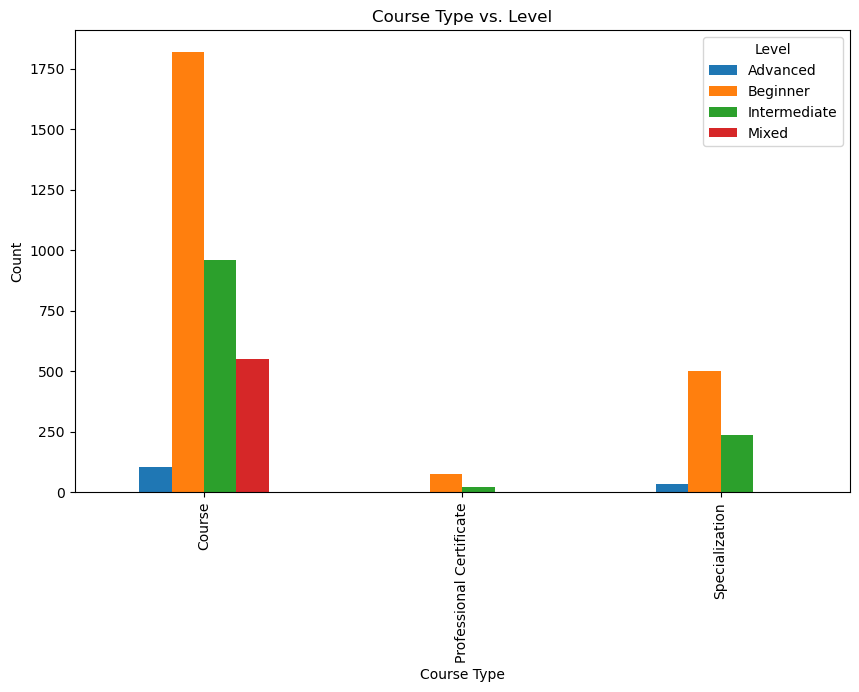

In [59]:
level_type_counts = df.groupby(['Type', 'Level']).size().unstack(fill_value=0)

level_type_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Course Type vs. Level')
plt.xlabel('Course Type')
plt.ylabel('Count')

plt.show()

#### The chart shows a dominant focus on "Beginner" level courses in "Course" and "Specialization" types

### ---------------------------------

#### Chart 2: Provider vs. Rating

In [60]:
top_providers = df['Provider'].value_counts().nlargest(10).index

df_top_providers = df[df['Provider'].isin(top_providers)]

fig_provider_rating = px.histogram(df_top_providers, x='Provider', y='Rating', 
                             title='Provider vs. Average Rating (Top 10 Providers by Count)',
                             color='Provider', height = 600)

fig_provider_rating.show()

#### Most IBM enrollees have liked the courses.

In [61]:
df_top_providers

,Course Title,Rating,Provider,Level,Reviews,Type,Duration / Weeks
8,IBM Data Science,4.6,IBM,Beginner,130000.0,Professional Certificate,12 - 24
9,IBM Data Analyst,4.6,IBM,Beginner,80000.0,Professional Certificate,12 - 24
11,IBM AI Developer,4.6,IBM,Beginner,53000.0,Professional Certificate,12 - 24
12,Microsoft Power BI Data Analyst,4.6,Microsoft,Beginner,4200.0,Professional Certificate,12 - 24
13,IBM Full Stack Software Developer,4.6,IBM,Beginner,47000.0,Professional Certificate,12 - 24
...,...,...,...,...,...,...,...
4917,Animals and Institutions,4.8,University of Colorado Boulder,Beginner,59.0,Course,1 - 4
4923,Foundations of Virtual Instruction,4.5,"University of California, Irvine",Mixed,1500.0,Course,4 - 12
4925,Exploring Renewable Energy Schemes,4.7,University of Pennsylvania,Beginner,595.0,Course,4 - 12
4927,IoT Cloud,4.6,University of Illinois Urbana-Champaign,Intermediate,23.0,Course,1 - 4


### ---------------------------------

#### Chart 3: Reviews vs. Course Title

In [62]:
fig_reviews_course = px.histogram(df_top_10, x='Course Title', y='Reviews', color = 'Course Title',
                            title='Number of Reviews per Course',
                            height=600)
fig_reviews_course.show()

#### The "Python for Everybody" course has the highest number of reviews, indicating its popularity among learners compared to other courses

### ---------------------------------

#### Chart 4: Duration vs. Course Title

In [63]:
duration_counts = df['Duration / Weeks'].value_counts().reset_index()
duration_counts.columns = ['Duration / Weeks', 'Count'] 

fig_duration_pie = px.pie(duration_counts, names='Duration / Weeks', values='Count',
                          title='Distribution of Course Durations', width= 1000, height=600)

fig_duration_pie.update_traces(text=['1 to 4 weeks', '4 to 12 weeks', '12 to 24 weeks'],  # Add your desired text for each slice
                               textposition='inside',   # Position the text inside the slices
                               textinfo='text+percent', textfont_size=16) 

fig_duration_pie.show()

#### A three-month period is the most preferred duration for courses.

### ---------------------------------

#### Chart 5: Type vs. Provider

In [64]:
top_providers = df['Provider'].value_counts().nlargest(10).index

df_top_providers2 = df[df['Provider'].isin(top_providers)]
fig_type_provider = px.scatter(df_top_providers2, x='Type', y='Provider',
                               color='Provider',
                               title='Type of Course by Provider (Top 10 Providers by Count)', width= 1000, height=600)

fig_type_provider.update_traces(marker=dict(size=10))

fig_type_provider.show()

#### Professional certificates are not offered by many companies.

### ---------------------------------

#### Chart 6: Provider vs. reviews

In [65]:
top_providers = df['Provider'].value_counts().nlargest(5).index
df_top_providers = df[df['Provider'].isin(top_providers)]

fig_rating_provider = px.histogram(df_top_providers, x='Provider', y='Reviews', 
                             title='Reviews VS Provider',                           
                             color='Provider', height=600)
fig_rating_provider.show()

#### Most of the top providers by reviews are universities.

### ---------------------------------

#### Chart 7: Rating vs. reviews

In [66]:
fig_reviews_rating = px.scatter(df, x='Rating', y='Reviews',
                                title='Number of Reviews by Rating',
                                color='Rating')
fig_reviews_rating.show()

#### The majority of courses on Coursera have high ratings

### ---------------------------------

#### Chart 8: Course vs Duration

In [67]:
fig_duration_top_courses = px.scatter(df_top_10, x='Course Title', y='Duration / Weeks',
                                  title='Duration of Top 10 Courses',
                                      color='Duration / Weeks', height=600)

fig_duration_top_courses.update_traces(marker=dict(size=10))

fig_duration_top_courses.show()

In [68]:
df

,Course Title,Rating,Provider,Level,Reviews,Type,Duration / Weeks
0,Google Data Analytics,4.8,Google,Beginner,151000.0,Professional Certificate,12 - 24
1,Google Cybersecurity,4.8,Google,Beginner,35000.0,Professional Certificate,12 - 24
2,Google Project Management:,4.8,Google,Beginner,112000.0,Professional Certificate,12 - 24
3,Google Digital Marketing & E-commerce,4.8,Google,Beginner,30000.0,Professional Certificate,12 - 24
4,Google UX Design,4.8,Google,Beginner,83000.0,Professional Certificate,12 - 24
...,...,...,...,...,...,...,...
4952,Fundamentals of Machine Learning for Supply Chain,3.9,LearnQuest,Beginner,32.0,Course,1 - 4
4953,Generative Design for Industrial Applications,4.8,Autodesk,Intermediate,88.0,Course,1 - 4
4955,Social Media and Social Content Strategy,4.4,Digital Marketing Institute,Beginner,62.0,Course,1 - 4
4956,Iteration Planning and PI in Scaled Agile Fram...,3.5,Board Infinity,Intermediate,6.0,Course,1 - 4


In [69]:
df.to_csv('cleaned_coursera_dataset.csv', index=False)
from IPython.display import FileLink
FileLink("cleaned_coursera_dataset.csv")

c:\Users\LENOVO\Downloads\cleaned_coursera_dataset.csv